# Lending Club Loan Project

# Description

The project is from a Kaggle and the data can be obtained from [here](https://www.kaggle.com/wendykan/lending-club-loan-data). These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. 


# Goal
The goal of this project is to build a Machine Learning Model which will be able to predict the **probability** of Loan to get paid on time.  
Our **hypothesis** is that there exists some characteristics of the Loans which can help us to estimate the probability of loans to be paid on time vs not. Also it is known that in credit risk the banks apply similar models before they issue a loand or during the loan the estimate the probability to default or not get paid on time.  
We will treat this problem both as a regression model where our prediction is a continuous variable which is the probability [0,1] or as classification problem where the prediction will be a class of {0,1} i.e. get paid on time or not. In order to evaluate the model we will use some measures like accuracy, log loss, sensitivity, specificity, F1 Ratio etc. Finally we will split the data set into a **Train** and **Test** dataset in order to be able to detect any **bias** or and **variance** of the model and to get better estimate of the performance of the model.

# Dataset Description
At this point we will represent the structure of the data that we are going to work with

In [73]:
import pandas as pd
import numpy as np

pd.set_option('max_columns', 100)
#pd.set_option('max_colwidth', 5000)
#pd.reset_option('max_colwidth')
# Load the csv fild
raw_df=pd.read_csv('loan.csv',  low_memory=False)


In [74]:
# Get the dimensions of the dataset

raw_df.shape

(887379, 74)

In [75]:
# Get the first rows of the dataset

raw_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Get a column description of the dataset
pd.read_excel("LCDataDictionary.xlsx")

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...
2,annual_inc_joint,The combined self-reported annual income provi...
3,application_type,Indicates whether the loan is an individual ap...
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
6,delinq_2yrs,The number of 30+ days past-due incidences of ...
7,desc,Loan description provided by the borrower
8,dti,A ratio calculated using the borrower’s total ...
9,dti_joint,A ratio calculated using the co-borrowers' tot...


In [77]:
# Get a description of the numeric variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

raw_df.select_dtypes(include=numerics).describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,NaN,11.910000,NaN,NaN,NaN,NaN,NaN,NaN,6.443000e+03,NaN,NaN,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,NaN,17.650000,NaN,NaN,NaN,NaN,NaN,NaN,1.187500e+04,NaN,NaN,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,NaN,23.950000,NaN,NaN,NaN,NaN,NaN,NaN,2.082900e+04,NaN,NaN,13659.055000,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6.8

In [78]:
# Get a description of the non numeric variables
raw_df.select_dtypes(exclude=numerics).describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,887379,887379,887379,835922,887379,887379,887379,887379,887379,887379,887379,126029,887379,887228,887379,887379,887350,887379,869720,634408,887326,887379,511
unique,2,7,35,299272,12,6,3,103,10,2,887379,124470,14,63145,935,51,697,2,98,100,103,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,621125,254535,56323,13469,291569,443557,329558,48631,601779,887369,1,246,524215,414001,9770,129517,6659,456848,470150,553406,730574,886868,283


# Data Cleansing and Feature Engineering

In the real world when we deal with the large datasets it is very common to do some data cleansing before we proceed to the exploratory analysis. In our case the data can be considered as structure however we will need to apply some changings. 

In [79]:
# First we check if there are duplicates in the dataset and as we can see there are not any
raw_df.duplicated().sum()

0

As we saw earlier there are 74 columns in the dataset. Clearly we will need to remove some of them which cannot be used in our analysis.

In [80]:
# Print the column names
list(raw_df)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [81]:
# Lets remove the ID, MemberID, the URL and the hashed zip_code
col_to_remove_I=['id',
 'member_id',
 'url',
 'zip_code']

raw_df.drop(col_to_remove_I, axis=1, inplace=True)
raw_df.shape

(887379, 70)

In [82]:
# Also we can remove the dates since we are not going to treat it as a time series case

col_to_remove_II=['earliest_cr_line',
 'inq_last_6mths',
 'last_pymnt_d',
 'last_credit_pull_d', 'issue_d', 'next_pymnt_d']

raw_df.drop(col_to_remove_II, axis=1, inplace=True)
raw_df.shape

(887379, 64)

In [83]:
# Also as we can see the emp_title has 299273 unique values so we use it as catecorical variable. 
# The same with the descr which is a plain text. However later one we can done a quick analysis by applying some Text Mining
# Techniques
# len(raw_df.emp_title.unique())
# You can run this command to see the values per case
# raw_df.emp_title.value_counts()

col_to_remove_III=['emp_title', 'desc']
raw_df.drop(col_to_remove_III, axis=1, inplace=True)
raw_df.shape

(887379, 62)

### Define the Y Variable

In our case the "Y" is a binary variable which is the Loan to get paid on time vs not. In our dataset the relevant columns is the **'loan_status'**. Let's have a look of the values of it

In [84]:
pd.DataFrame(raw_df.loan_status.value_counts())

,loan_status
Current,601779
Fully Paid,207723
Charged Off,45248
Late (31-120 days),11591
Issued,8460
In Grace Period,6253
Late (16-30 days),2357
Does not meet the credit policy. Status:Fully Paid,1988
Default,1219
Does not meet the credit policy. Status:Charged Off,761


As we can see we can create a binary variable but first we will need to **remove all the rows of the 'Current' loan status since these loans are still active and irrelevant to our analysis**

In [85]:
# Remove the rows of loan_status= Current

raw_df=raw_df[raw_df['loan_status']!='Current']

# Remove also the Issued
raw_df=raw_df[raw_df['loan_status']!='Issued']

# And this is how we can check that indeed have been removed
# pd.DataFrame(raw_df.loan_status.value_counts())

Now we can define the Y variable as "1" when the Loan is Fully Paid and "0" otherwise

In [86]:
raw_df.loc[raw_df.loan_status=='Fully Paid', 'loan_status']=1
raw_df.loc[raw_df.loan_status=='Does not meet the credit policy. Status:Fully Paid', 'loan_status']=1
raw_df.loc[raw_df.loan_status!=1, 'loan_status']=0

In [87]:
raw_df['Y']=raw_df['loan_status']
raw_df.drop('loan_status', axis=1, inplace=True)

In [88]:
# Let's see also the number of 1 and 0 cases
raw_df.Y.value_counts()

1    209711
0     67429
Name: Y, dtype: int64

### Modify the 'emp_length' Column

In [89]:
# As we can see it has the years in text so we need to convert it to a numeric one

pd.DataFrame(raw_df.emp_length.value_counts())

,emp_length
10+ years,83918
2 years,25828
< 1 year,23210
3 years,22436
5 years,19518
1 year,18643
4 years,17660
6 years,15999
7 years,15281
8 years,13028


In [90]:

def emp_apply(x):
    if x=='< 1 year':
        status=0
        return status
    elif x=='1 year':
        status=1
        return status
    elif x=='2 years':
        status=2
        return status
    elif x=='3 years':
        status=3
        return status
    elif x=='4 years':
        status=4
        return status
    elif x=='5 years':
        status=5
        return status
    elif x=='6 years':
        status=6
        return status
    elif x=='7 years':
        status=7
        return status
    elif x=='8 years':
        status=8
        return status
    elif x=='9 years':
        status=9
        return status
    elif x=='10+ years':
        status=10
        return status
    else:
        status=0
        
        return status

In [91]:
raw_df['emp_length']=raw_df['emp_length'].apply(lambda x: emp_apply(x))

In [92]:
pd.DataFrame(raw_df.emp_length.value_counts())

,emp_length
10,83918
0,34311
2,25828
3,22436
5,19518
1,18643
4,17660
6,15999
7,15281
8,13028


### Modify the 'addr_state' Column

In [93]:
# In the model we cannot have many categorical values in one column and it is reasonable to group some values together.
# Let's have a look at the 'addr_state' column. So our scope here is to group the states by region
pd.DataFrame(raw_df.addr_state.value_counts())

,addr_state
CA,46519
NY,23694
TX,21193
FL,19329
NJ,10549
IL,10080
PA,9329
GA,8784
VA,8734
OH,8486


In [94]:
d= {'AK':'W',
'AL':'SE',
'AR':'SE',
'AZ':'SW',
'CA':'W',
'CO':'W',
'CT':'NE',
'DC':'NE',
'DE':'NE',
'FL':'SE',
'GA':'SE',
'HI':'W',
'IA':'MW',
'ID':'W',
'IL':'MW',
'IN':'MW',
'KS':'MW',
'KY':'SE',
'LA':'SE',
'MA':'NE',
'MD':'NE',
'ME':'NE',
'MI':'MW',
'MN':'MW',
'MO':'MW',
'MS':'SE',
'MT':'W',
'NC':'SE',
'ND':'MW',
'NE':'MW',
'NH':'NE',
'NJ':'NE',
'NM':'SW',
'NV':'W',
'NY':'NE',
'OH':'MW',
'OK':'SW',
'OR':'W',
'PA':'NE',
'RI':'NE',
'SC':'SE',
'SD':'MW',
'TN':'SE',
'TX':'SW',
'UT':'W',
'VA':'SE',
'VT':'NE',
'WA':'W',
'WI':'MW',
'WV':'SE',
'WY':'W'
}

In [95]:
raw_df['addr_state']=raw_df['addr_state'].map(d)

In [96]:
pd.DataFrame(raw_df.addr_state.value_counts())

,addr_state
W,72845
NE,65509
SE,63260
MW,43780
SW,31746


### Remove some other categorical variables

In [97]:
# Let's have a look at the other categorical variables
# we can remove from the model the sub_grade since we have the grade

raw_df.drop('sub_grade', axis=1, inplace=True)


In [98]:
# Also we can remove the title since it has too many values

raw_df.drop('title', axis=1, inplace=True)

In [99]:
# Also we should remove the application type because it is almost constant since only 6 applications are not individual
raw_df.drop('application_type', axis=1, inplace=True)

In [100]:
# We must exlude the 'verification_status_joint' because almost ALL values are NaN
raw_df.drop('verification_status_joint', axis=1, inplace=True)

In [101]:
# We must exlude the 'pymnt_plan' because almost ALL values are 'n'
raw_df.drop('pymnt_plan', axis=1, inplace=True)

In [102]:
# Also we can group the purpose values

raw_df.purpose.value_counts()

debt_consolidation    163180
credit_card            54276
home_improvement       16356
other                  15807
major_purchase          6785
small_business          5245
car                     3845
medical                 3125
moving                  2241
wedding                 2022
house                   1816
vacation                1733
educational              422
renewable_energy         287
Name: purpose, dtype: int64

In [103]:
d= {'debt_consolidation':'debt_consolidation',
'credit_card':'credit_card',
'home_improvement':'home_improvement',
'other':'other',
'major_purchase':'other',
'small_business':'other',
'car':'other',
'medical':'other',
'moving ':'other',
'wedding':'other',
'house':'other',
'vacation':'other',
'educational':'other',
'renewable_energy':'other'
    }

In [104]:
raw_df['purpose']=raw_df['purpose'].map(d)

In [105]:
raw_df.purpose.value_counts()

debt_consolidation    163180
credit_card            54276
other                  41087
home_improvement       16356
Name: purpose, dtype: int64

In [106]:
# Also we will need to group the home_ownership column

d={'MORTGAGE':'MORTGAGE',
'RENT':'RENT',
'OWN':'OWN',
'OTHER':'OTHER',
'NONE':'OTHER',           
'ANY':'OTHER'}

In [107]:
raw_df['home_ownership']=raw_df['home_ownership'].map(d)

In [108]:
# Let's have a look of our data frame. So far we have 277140 rows and 57 columns
raw_df.shape

(277140, 57)

In [109]:
raw_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,Y
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10,RENT,24000.0,Verified,credit_card,SW,27.65,0.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,Source Verified,other,SE,1.00,0.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10,RENT,12252.0,Not Verified,other,MW,8.72,0.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10,RENT,49200.0,Source Verified,other,W,20.00,0.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,3,RENT,36000.0,Source Verified,other,SW,11.20,0.0,NaN,NaN,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [110]:
raw_df.verification_status.value_counts()

Verified           101552
Not Verified        92571
Source Verified     83017
Name: verification_status, dtype: int64

### Missing Values

In [111]:
# There are columns with many missing values and we can remove them or to replace the values
# Let's have a look of those columns
# Below we represent the % of the null values per column
raw_df.isnull().sum()/len(raw_df.loan_amnt)

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000014
verification_status            0.000000
purpose                        0.008086
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000105
mths_since_last_delinq         0.548207
mths_since_last_record         0.869788
open_acc                       0.000105
pub_rec                        0.000105
revol_bal                      0.000000
revol_util                     0.000913
total_acc                      0.000105
initial_list_status            0.000000
out_prncp                      0.000000
out_prncp_inv                  0.000000


In [112]:
# We are going to remove all those columns with a proportion of null values greater than 80%
isgreater=pd.DataFrame(raw_df.isnull().sum()/len(raw_df.loan_amnt)>0.8)

In [113]:
KeepColumns=list(isgreater.loc[isgreater[0]==False,].index)

In [114]:
### Keep only the columns with less than 80% NaN values
raw_df=raw_df[KeepColumns]

### Low Variance Columns

In [115]:
# The are columns of low variance which do not add any information in the model since there are almost constant. 
# Thus we can remove some of them, and particularly those with a variance less than 0.5

##Get the columns with a variance less than 5
lowvariance=pd.DataFrame(raw_df.std()<0.5)
RemoveColumns=list(lowvariance.loc[lowvariance[0]==True,].index)
### Keep only the columns with a variance greater than 5
raw_df=raw_df.drop(RemoveColumns, axis=1)

### Dealing with Missing Values

In [116]:
# Still there exist columns with missing values
raw_df.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
emp_length                      0
home_ownership                  0
annual_inc                      4
verification_status             0
purpose                      2241
addr_state                      0
dti                             0
delinq_2yrs                    29
mths_since_last_delinq     151930
open_acc                       29
revol_bal                       0
revol_util                    253
total_acc                      29
initial_list_status             0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_inv                 0
total_rec_prncp                 0
total_rec_int                   0
total_rec_late_fee              0
recoveries                      0
collection_rec

In [117]:
raw_df[['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'mths_since_last_delinq', 'total_acc', 
        'revol_util', 'open_acc', 'mths_since_last_delinq',
       'delinq_2yrs', 'purpose', 'annual_inc']].head()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_delinq,total_acc,revol_util,open_acc,mths_since_last_delinq,delinq_2yrs,purpose,annual_inc
0,NaN,NaN,NaN,NaN,9.0,83.7,3.0,NaN,0.0,credit_card,24000.0
1,NaN,NaN,NaN,NaN,4.0,9.4,3.0,NaN,0.0,other,30000.0
2,NaN,NaN,NaN,NaN,10.0,98.5,2.0,NaN,0.0,other,12252.0
3,NaN,NaN,NaN,35.0,37.0,21.0,10.0,35.0,0.0,other,49200.0
5,NaN,NaN,NaN,NaN,12.0,28.3,9.0,NaN,0.0,other,36000.0


In [118]:
# fill the NaN values of purpose with 'other'
raw_df['purpose']=raw_df['purpose'].fillna('other')

In [119]:
# fill the NaN values of the following columns with 0
raw_df['tot_coll_amt']=raw_df['tot_coll_amt'].fillna(0)
raw_df['tot_cur_bal']=raw_df['tot_cur_bal'].fillna(0)
raw_df['total_rev_hi_lim']=raw_df['total_rev_hi_lim'].fillna(0)

In [120]:
# We can convert the mths_since_last_delinq to categorical since the 50% is null
def mths_since_last_delinq_apply(x):
    if x<=10:
        status='[0-10]'
        return status
    elif x<=50:
        status='[11-50]'
        return status
    elif x>50:
        status='[50+]'
        return status
   
    else:
        status='[N/A]'
        
        return status

In [121]:
raw_df['mths_since_last_delinq']=raw_df['mths_since_last_delinq'].apply(lambda x: mths_since_last_delinq_apply(x))

In [122]:
raw_df.mths_since_last_delinq.value_counts()

[N/A]      151930
[11-50]     75310
[50+]       31423
[0-10]      18477
Name: mths_since_last_delinq, dtype: int64

In [123]:
# The last columns with the missign values will be replaced with the median

raw_df['total_acc']=raw_df['total_acc'].fillna(raw_df['total_acc'].median())
raw_df['revol_util']=raw_df['revol_util'].fillna(raw_df['revol_util'].median())
raw_df['open_acc']=raw_df['open_acc'].fillna(raw_df['open_acc'].median())
raw_df['delinq_2yrs']=raw_df['delinq_2yrs'].fillna(raw_df['delinq_2yrs'].median())
raw_df['annual_inc']=raw_df['annual_inc'].fillna(raw_df['annual_inc'].median())

In [124]:
##check that there is no missing value anymore!
raw_df.isnull().sum().sum()

0L

# Exploratory Analysis

In [125]:
#stats
from scipy import stats
#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
%matplotlib inline

### Collinearity

At this point we will try to find the correlated variables. As we can see from the plot there are variables which are high positive correlated!

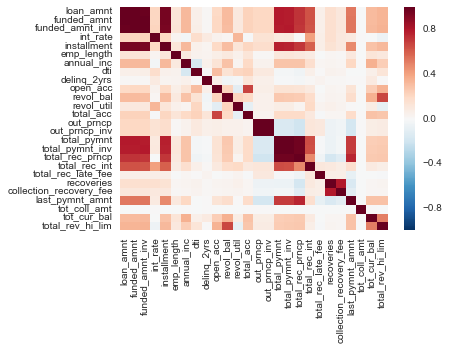

In [127]:
#sns.pairplot(raw_df.select_dtypes(include=numerics)) 
# take ages - do not run!!!

corr=raw_df.corr()

sns.heatmap(corr)

In [128]:
# Let's see which variables have a correlation greater than 0.75
corr[corr>0.75]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1.000000,0.997740,0.990640,NaN,0.954557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.789362,0.786577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt,0.997740,1.000000,0.993419,NaN,0.957926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790260,0.787935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.990640,0.993419,1.000000,NaN,0.950758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.784714,0.793094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,0.954557,0.957926,0.950758,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.774433,0.771563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delinq_2yrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see the *loan_amnt*,*funded_amnt*, *funded_amnt_inv*,	and *installment* are high correlated each other, so we will keep just one of those.  
Also the *out_prncp*, and *out_prncp_inv* are high correlated and we will keep one of those. 
Also the *recoveries* and *collection_recovery_fee* are high correlated.
Als the *last_pymnt_amnt* should be removed and the 
Finally the *total_pymnt*,	*total_pymnt_inv*, and	*total_rec_prncp* are high correlated and we will keep just one of those.

In [129]:
raw_df.drop(['funded_amnt','funded_amnt_inv', 'installment'], axis=1, inplace=True)

In [130]:
raw_df.drop(['out_prncp_inv'], axis=1, inplace=True)

In [131]:
raw_df.drop(['total_pymnt_inv', 'total_rec_prncp'], axis=1, inplace=True)

In [132]:
raw_df.drop(['recoveries'], axis=1, inplace=True)

In [133]:
raw_df.drop(['total_pymnt'], axis=1, inplace=True)

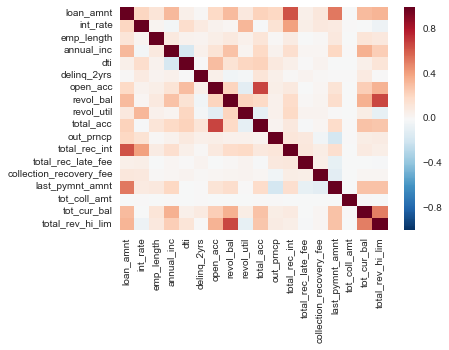

In [134]:
# As we can see we excluded the high correlated columns
corr=raw_df.corr()

sns.heatmap(corr)

### Some Plots Showing the interaction of two Variables

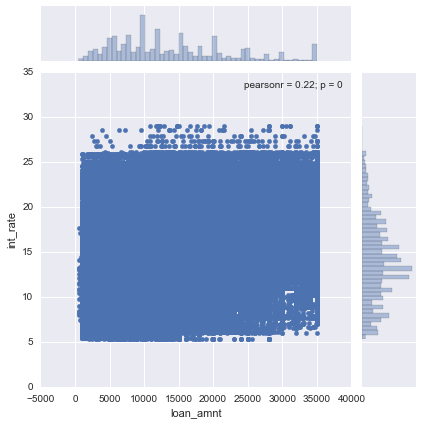

In [135]:
#At this point we can represent so joint plots
sns.jointplot('loan_amnt','int_rate',raw_df,kind='scatter')

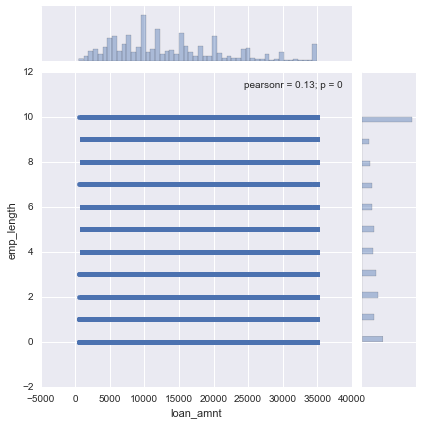

In [136]:
sns.jointplot('loan_amnt','emp_length',raw_df,kind='scatter')

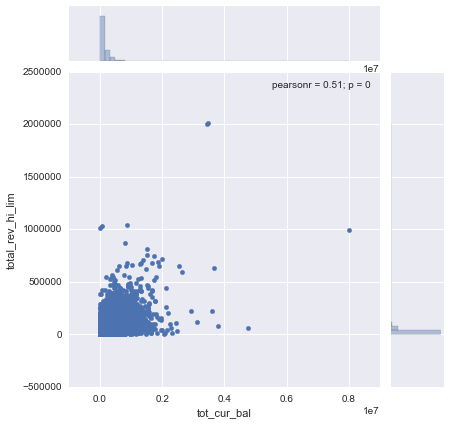

In [137]:
sns.jointplot('tot_cur_bal','total_rev_hi_lim',raw_df,kind='scatter')

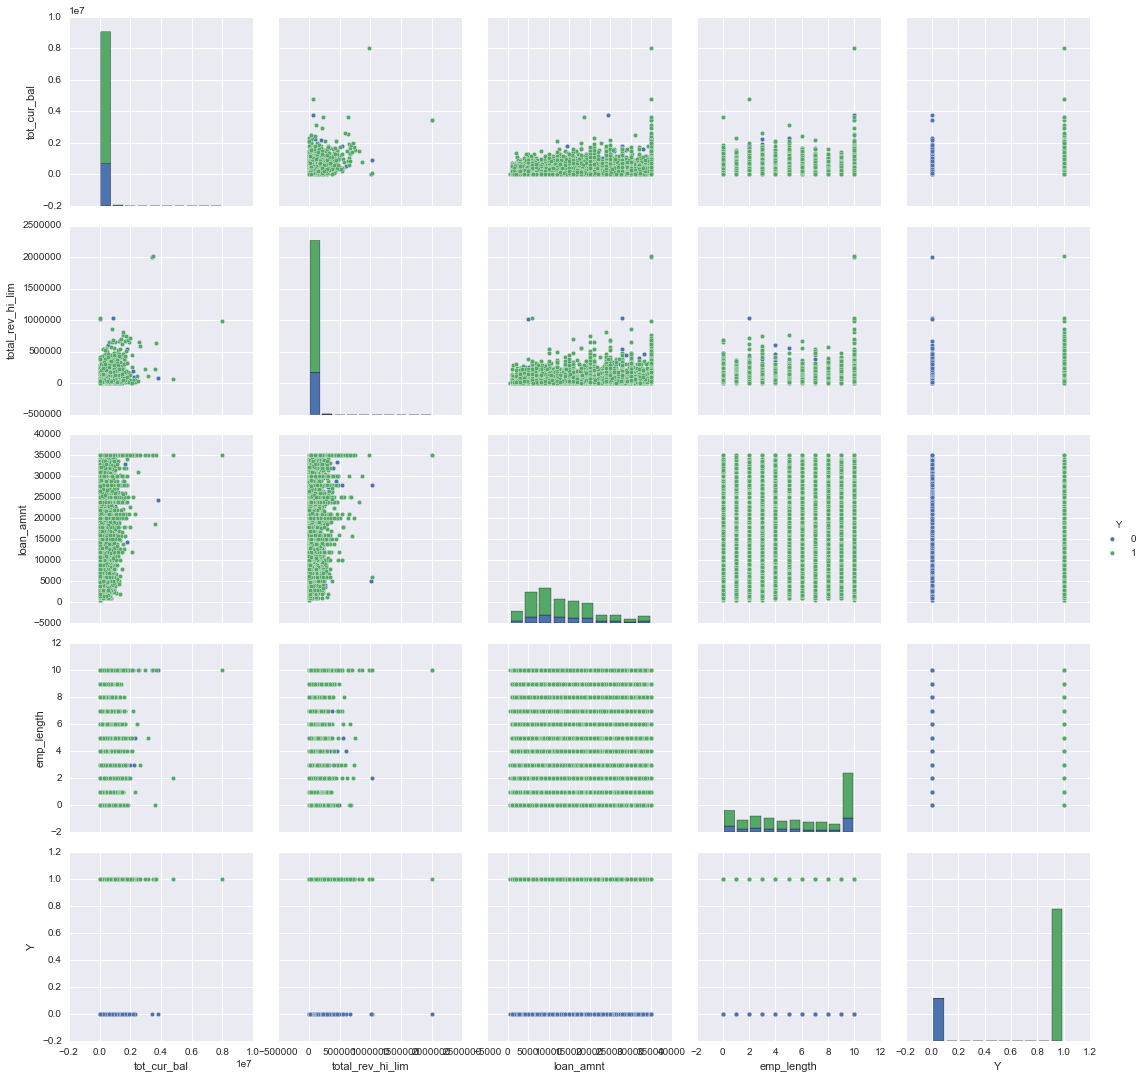

In [138]:
sns.pairplot(data=raw_df[['tot_cur_bal','total_rev_hi_lim', 'loan_amnt','emp_length', 'Y']], hue='Y', size=3)

### Let's see the Paid on Time Rate focusing on the levels of the Categorical Variables

In [140]:
raw_df['Y']=pd.to_numeric(raw_df['Y'])


### The correlation of the continuous variables with the dependent variable Y

In [143]:
pd.DataFrame(raw_df.corr().Y.sort_values(ascending = False))

,Y
Y,1.000000
last_pymnt_amnt,0.429682
annual_inc,0.048203
total_acc,0.024363
tot_cur_bal,0.020445
emp_length,0.015258
total_rev_hi_lim,0.001873
tot_coll_amt,0.000551
revol_bal,0.000504
open_acc,-0.029552


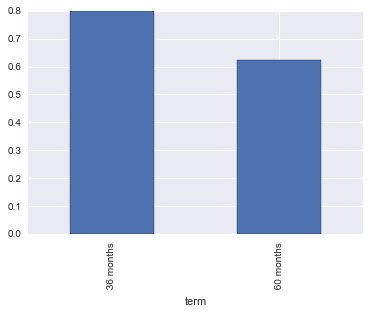

In [144]:
raw_df.groupby('term').mean().Y.plot(kind='bar')

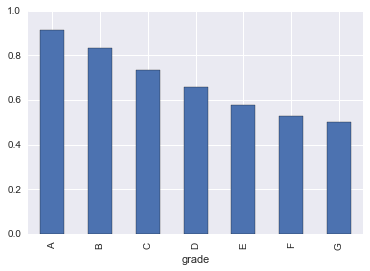

In [145]:
raw_df.groupby('grade').mean().Y.plot(kind='bar')

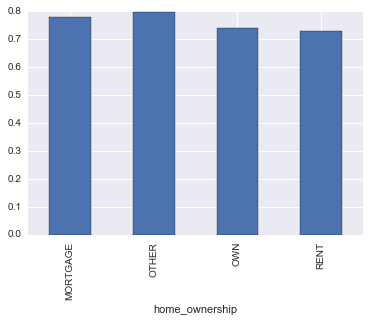

In [146]:
raw_df.groupby('home_ownership').mean().Y.plot(kind='bar')

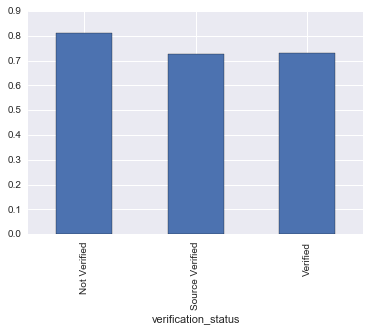

In [147]:
raw_df.groupby('verification_status').mean().Y.plot(kind='bar')

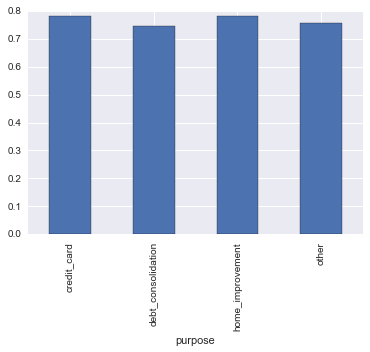

In [148]:
raw_df.groupby('purpose').mean().Y.plot(kind='bar')

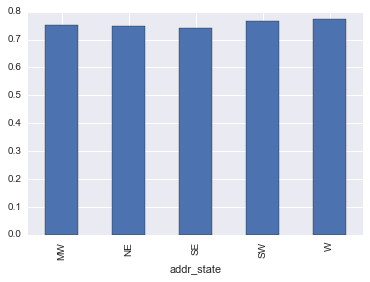

In [149]:
raw_df.groupby('addr_state').mean().Y.plot(kind='bar')

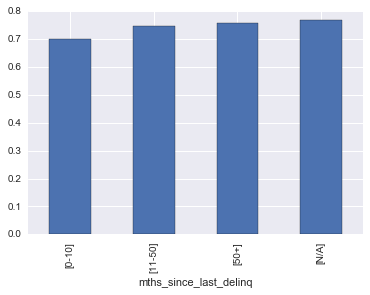

In [150]:
raw_df.groupby('mths_since_last_delinq').mean().Y.plot(kind='bar')

[]

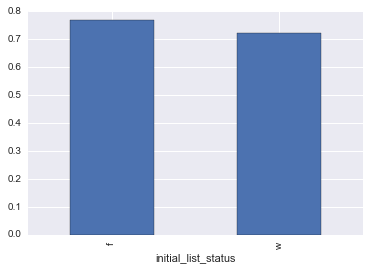

In [151]:
raw_df.groupby('initial_list_status').mean().Y.plot(kind='bar').plot(kind='bar')

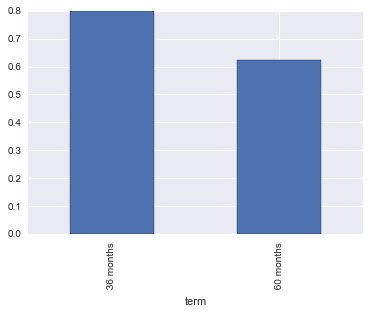

In [152]:
raw_df.groupby('term').mean().Y.plot(kind='bar')

### Some other plots regarding the Proportion of the good Loans vs the Categorical Variables

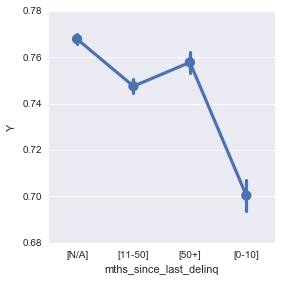

In [153]:
sns.factorplot('mths_since_last_delinq','Y',data=raw_df)

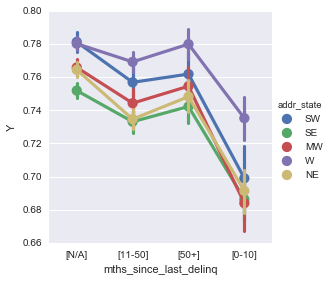

In [154]:
sns.factorplot('mths_since_last_delinq','Y', hue='addr_state',data=raw_df)

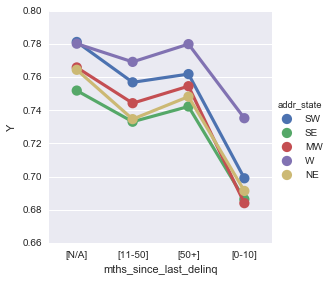

In [155]:
# Without Condifence Interval
sns.factorplot('mths_since_last_delinq','Y', hue='addr_state', ci=None, data=raw_df)

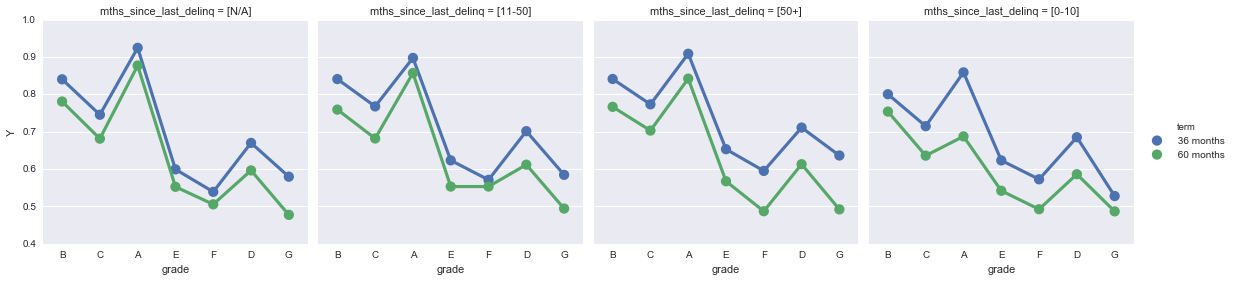

In [156]:
# Taking into account three categorical variables and the dependent Y
sns.factorplot('grade','Y', hue='term', ci=None, col='mths_since_last_delinq', data=raw_df)

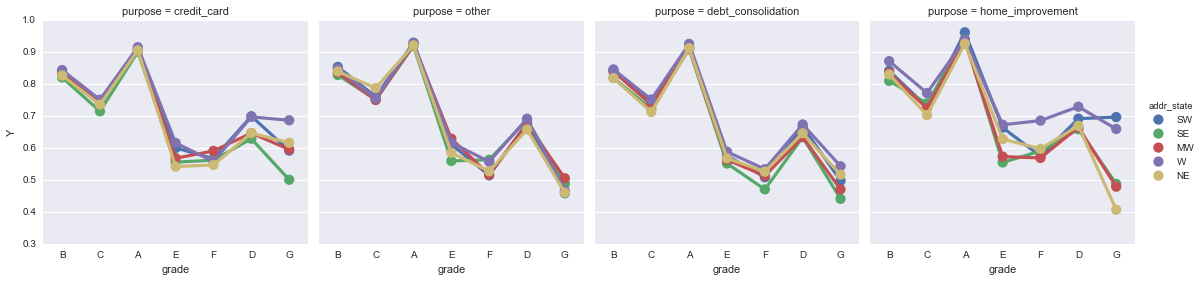

In [157]:
sns.factorplot('grade','Y', hue='addr_state', ci=None, col='purpose', data=raw_df)

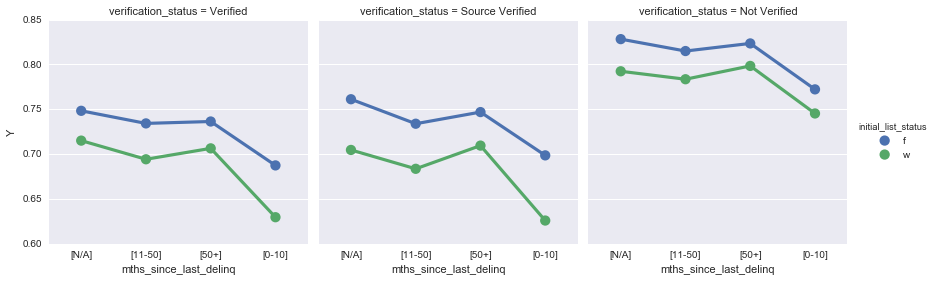

In [158]:
sns.factorplot('mths_since_last_delinq','Y', hue='initial_list_status', ci=None, col='verification_status', data=raw_df)

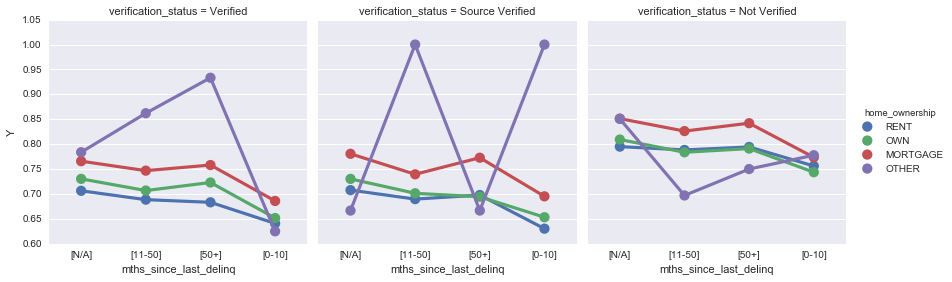

In [159]:
sns.factorplot('mths_since_last_delinq','Y', hue='home_ownership', ci=None, col='verification_status', data=raw_df)

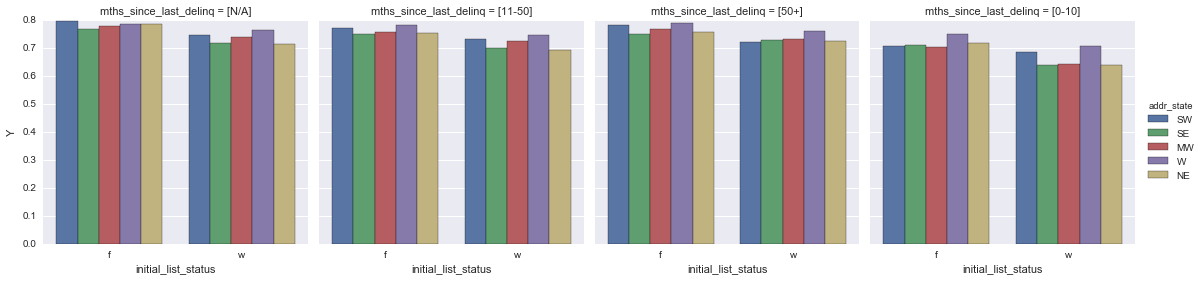

In [160]:
# We can also change the type like bars 
# Taking into account three categorical variables and the dependent Y
sns.factorplot('initial_list_status','Y', hue='addr_state', kind='bar',ci=None, col='mths_since_last_delinq', data=raw_df)

# Creating the Dummy Variables

At this point we will need to create dummy variables for the categorical ones. The categorical variables that we have are following:

In [161]:
list(raw_df.select_dtypes(exclude=numerics))

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'mths_since_last_delinq',
 'initial_list_status']

In [162]:
term_df=pd.get_dummies(raw_df.term, prefix='term')
grade_df=pd.get_dummies(raw_df.grade, prefix='grade')
home_df=pd.get_dummies(raw_df.home_ownership, prefix='home')
status_df=pd.get_dummies(raw_df.verification_status, prefix='status')
purpose_df=pd.get_dummies(raw_df.purpose, prefix='purpose')
state_df=pd.get_dummies(raw_df.addr_state, prefix='state')
mths_df=pd.get_dummies(raw_df.mths_since_last_delinq, prefix='mths')
initial_df=pd.get_dummies(raw_df.initial_list_status, prefix='initial')

df=raw_df.join([term_df, grade_df, home_df, status_df, purpose_df, state_df, mths_df,  initial_df  ])

In [163]:
# now we will need to drop the categorical variables since we created the dummies

df.drop(list(raw_df.select_dtypes(exclude=numerics)), axis=1, inplace=True)



In [164]:
# also we need to remove the reference levels
list(df)

['loan_amnt',
 'int_rate',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'Y',
 'term_ 36 months',
 'term_ 60 months',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'home_MORTGAGE',
 'home_OTHER',
 'home_OWN',
 'home_RENT',
 'status_Not Verified',
 'status_Source Verified',
 'status_Verified',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_other',
 'state_MW',
 'state_NE',
 'state_SE',
 'state_SW',
 'state_W',
 'mths_[0-10]',
 'mths_[11-50]',
 'mths_[50+]',
 'mths_[N/A]',
 'initial_f',
 'initial_w']

In [165]:
reference_levels=['initial_f', 'mths_[0-10]', 'state_MW', 'purpose_credit_card', 
                  'status_Not Verified', 'home_MORTGAGE', 'grade_A', 'term_ 36 months']

df.drop(reference_levels, axis=1, inplace=True)

In [166]:
df.head()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Y,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_OTHER,home_OWN,home_RENT,status_Source Verified,status_Verified,purpose_debt_consolidation,purpose_home_improvement,purpose_other,state_NE,state_SE,state_SW,state_W,mths_[11-50],mths_[50+],mths_[N/A],initial_w
0,5000.0,10.65,10,24000.0,27.65,0.0,3.0,13648.0,83.7,9.0,0.0,861.07,0.00,0.00,171.62,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2500.0,15.27,0,30000.0,1.00,0.0,3.0,1687.0,9.4,4.0,0.0,435.17,0.00,1.11,119.66,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2400.0,15.96,10,12252.0,8.72,0.0,2.0,2956.0,98.5,10.0,0.0,603.65,0.00,0.00,649.91,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10000.0,13.49,10,49200.0,20.00,0.0,10.0,5598.0,21.0,37.0,0.0,2209.33,16.97,0.00,357.48,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,5000.0,7.90,3,36000.0,11.20,0.0,9.0,7963.0,28.3,12.0,0.0,631.38,0.00,0.00,161.03,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Build the Logistic Regression Model

In [167]:
from sklearn import linear_model, cross_validation

### Split the dataset into Train and Test dataset (75% vs 25%)

In [168]:
train_df = df.sample(frac = .75, random_state = 0)
test_df = df.drop(train_df.index)

In [169]:
test_df.shape

(69285, 42)

In [170]:
train_df.shape

(207855, 42)

In [171]:
train_X=train_df.drop('Y', axis=1)

In [172]:
train_y=train_df.Y

In [173]:
test_X=test_df.drop('Y', axis=1)

In [174]:
test_y=test_df.Y

**Print the Intercept and the Coefficients of the model**

In [175]:
model = linear_model.LogisticRegression().\
    fit(train_X, train_y)

print model.intercept_
print model.coef_

[  5.58825125e-06]
[[ -1.19126477e-04  -1.12172745e-04   1.61326430e-05   1.23666693e-05
   -2.06986271e-05  -3.03944005e-06   2.51903192e-05   1.00790888e-05
   -1.28820907e-04   7.41341776e-05  -2.10204810e-03   1.66411441e-04
   -1.01669341e-04  -2.94118190e-03   1.45330751e-03  -5.26611802e-05
   -1.31176640e-06  -9.00842588e-06  -1.00606755e-05   8.59478871e-06
   -2.13323930e-06  -5.07848390e-06  -4.56726237e-06  -2.35642864e-06
   -7.16343858e-07   7.73825490e-08   4.74033283e-07   1.33082073e-06
   -1.10419467e-06  -2.04787995e-06  -2.38479388e-07   6.54404128e-07
    2.27782744e-06   1.84207630e-06   4.76183955e-07   9.42604363e-07
    1.70029461e-06   1.35499445e-07   5.13707770e-08   5.88250973e-06
   -4.00289568e-06]]


** Get the misclassification error for the training and testing dataset**

In [176]:
print 'training misclassification =', 1 - model.score(train_X, train_y)
print 'testing  misclassification =', 1 - model.score(test_X, test_y)

training misclassification = 0.102662914051
testing  misclassification = 0.101984556542


** Get the Odds Ratio**

In [177]:

zip(list(train_df), np.exp(model.coef_[0]) )

[('loan_amnt', 0.99988088061800939),
 ('int_rate', 0.99988783354595923),
 ('emp_length', 1.0000161327731165),
 ('annual_inc', 1.0000123667458019),
 ('dti', 0.99997930158715576),
 ('delinq_2yrs', 0.99999696056456644),
 ('open_acc', 1.0000251906364381),
 ('revol_bal', 1.0000100791396207),
 ('revol_util', 0.99987118738968106),
 ('total_acc', 1.0000741369255903),
 ('out_prncp', 0.99790015965452494),
 ('total_rec_int', 1.0001664252879057),
 ('total_rec_late_fee', 0.99989833582709298),
 ('collection_recovery_fee', 0.99706313914228539),
 ('last_pymnt_amnt', 1.0014543640721953),
 ('tot_coll_amt', 0.99994734020636544),
 ('tot_cur_bal', 0.99999868823446181),
 ('total_rev_hi_lim', 0.9999909916147004),
 ('Y', 0.99998993937511949),
 ('term_ 60 months', 1.0000085948256481),
 ('grade_B', 0.99999786676297953),
 ('grade_C', 0.99999492152899261),
 ('grade_D', 0.99999543274806346),
 ('grade_E', 0.99999764357413157),
 ('grade_F', 0.99999928365639856),
 ('grade_G', 1.0000000773825519),
 ('home_OTHER', 1.00

### Other Metrics for Evaluating the Model

** Confusion Matrix**

In [178]:

from sklearn.metrics import confusion_matrix

y_pred=model.predict(test_X)
y_pred_prob=model.predict_proba(test_X)
cnf_matrix =confusion_matrix(test_y, y_pred)

In [179]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm=cm.round(2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[12551  4147]
 [ 2919 49668]]


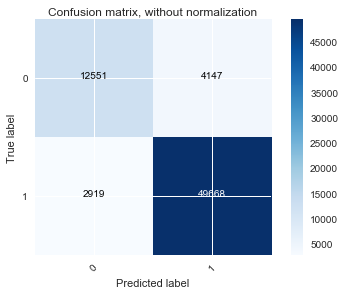

In [180]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.75  0.25]
 [ 0.06  0.94]]


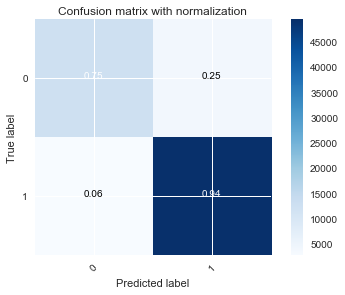

In [181]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'], normalize=True,
                      title='Confusion matrix with normalization')

** ROC Curve and AUC**

In [182]:
from sklearn import metrics


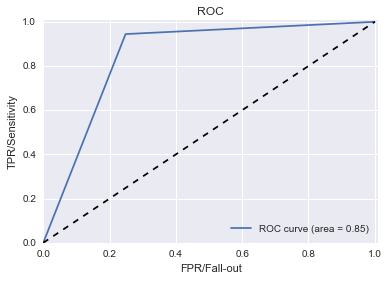

In [183]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("ROC")
plt.legend(loc = 'lower right')
plt.show()

** Precision Recall and F1-Score**

In [184]:
print(metrics.classification_report(test_y, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.75      0.78     16698
          1       0.92      0.94      0.93     52587

avg / total       0.90      0.90      0.90     69285



** Log Loss **

In [185]:
metrics.log_loss(test_y, y_pred_prob[:,1])

0.22082869678444211

**Cohen Kappa**

In [186]:
metrics.cohen_kappa_score(test_y, y_pred)

0.71405816481397355

# Summary

The model appears to have a very good fitting and we can explicitly estimate the probability of a customer to pay on time the loan. The **Accuracy** of the model is around **90%**  the **Precision** is **81%** and the **Recall** is **94%** the **AUC** is **0.85**, the **Kappa** is **0.71** the **F1-Score** is **87%** and the **Log Loss** is **0.22**. We have also to meantion that these figures are on the **Test Dataset** and thus we can argue that the model has low **bias** and **variance**

# Discussion

The overall fitting of the model is very good but always there is a room of improvement. We could have worked more on the feature engineering. Also we could have tried different models like Random Forest, Naive Bays, KNN etc and to compare their performance. Also we could have tried to model the text variables like the "desc" and the "title". Of course this is more advanced since we have to deal also with unstructured data. 